## GRIPJULY21 : The Sparks Foundation-Data Science and Business Analytics Internship

## Author : Eldhose Varghese

## Task 1 : Prediction Using Supervised ML

##### In this task we have to predict the percentage score of a student based on the number of hours studied.The Dataset has two variables where the feature is the number of hours studied and the target variable is the percentage score.This can be solved using simple linear regression.

In [37]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1:Reading data 

In [6]:
url ="http://bit.ly/w-data"

In [7]:
# Read data from the given url
data = pd.read_csv(url)

### Step 2 : Exploratory Data Analysis

In [8]:
data.shape

(25, 2)

In [9]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


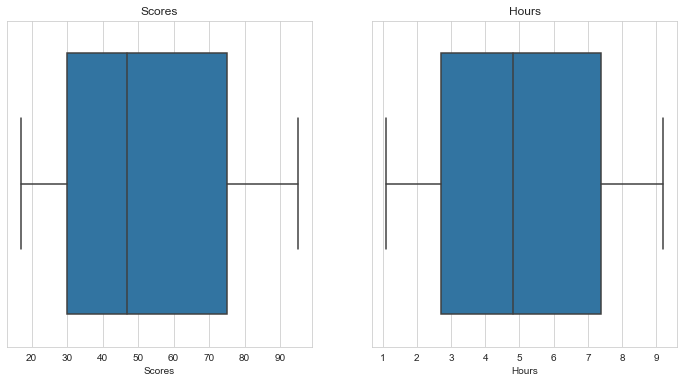

In [38]:
# To check for Outliers

fig = plt.figure(figsize=(12,6))

# putting ylim same for better visibility

ax1 = fig.add_subplot(1, 2, 1, title="Scores")
ax2 = fig.add_subplot(1, 2, 2, title="Hours")

sns.boxplot(data.Scores, ax=ax1)
sns.boxplot(data.Hours, ax=ax2)

plt.show()

No outlier found to be handled

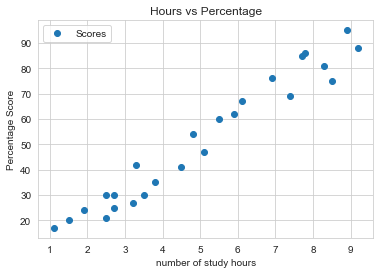

In [39]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('number of study hours')  
plt.ylabel('Percentage Score')  
plt.show()

From the above graph, we can infer that there is a positive linear relation between the number of study hours and Percentage Score

In [13]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [14]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


Hours and Scores are highly Positively correlated to each other

In [16]:
hrs=data['Hours']
scr=data['Scores']

<AxesSubplot:xlabel='Hours', ylabel='Density'>

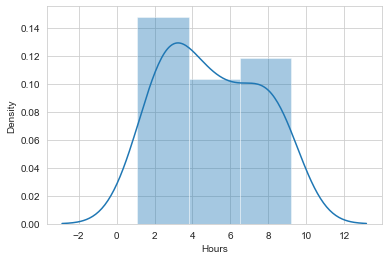

In [40]:
sns.distplot(hrs)

<AxesSubplot:xlabel='Scores', ylabel='Density'>

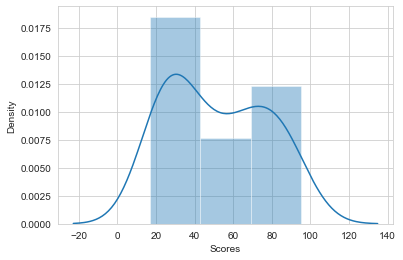

In [41]:
sns.distplot(scr)

### Step 3: Performing Simple Linear Regression

#### Generic Steps in model building

*First assign the feature variable, Hours to the variable X and the response variable, Score, to the variable y.

*To divide the data into "attributes" (inputs) and "labels" (outputs).

In [24]:
x= data.iloc[:, :-1].values
y= data.iloc[:,1].values

In [25]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [26]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Train-Test Split

* To split our variable into training and testing sets
* Will perform this by importing train_test_split from the sklearn.model_selection library.
* It is usually a good practice to keep 80% of the data in your train dataset and the rest 20% in your test dataset.


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [43]:
#Now let's take a look at train and test datasets individually

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


In [44]:
x_train

array([[4.5],
       [8.3],
       [2.7],
       [8.5],
       [7.4],
       [5.5],
       [7.7],
       [3.2],
       [1.9],
       [4.8],
       [7.8],
       [6.1],
       [1.5],
       [9.2],
       [3.5],
       [5.1],
       [3.3],
       [5.9],
       [2.5],
       [2.5]])

In [45]:
y_train

array([41, 81, 25, 75, 69, 60, 85, 27, 24, 54, 86, 67, 20, 88, 30, 47, 42,
       62, 21, 30], dtype=int64)

In [46]:
x_test

array([[8.9],
       [2.7],
       [6.9],
       [3.8],
       [1.1]])

In [47]:
y_test

array([95, 30, 76, 35, 17], dtype=int64)

#### After splitting the data into training and testing sets,finally it's the time to train our algorithm.

### Step 4 : Training Linear Regression Model

In [28]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

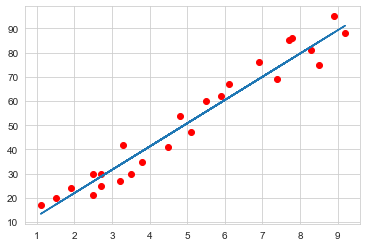

In [48]:
# Plotting the regression line
m=reg.coef_
c=reg.intercept_
line=m*x+c
plt.scatter(x,y,c='r')
plt.plot(x,line);
plt.show()

### Step 5: Predictions on the Test Set

`* Now that we have fitted a regression line on our train dataset, it's time to make some predictions on the test data
we can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [30]:
y_pred=reg.predict(x_test) # Predicting the scores

In [49]:
# Comparing Actual vs Predicted
actual_predicted=pd.DataFrame({'Actual Scores':y_test,'Predicted_Score':y_pred})
actual_predicted

,Actual Scores,Predicted_Score
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


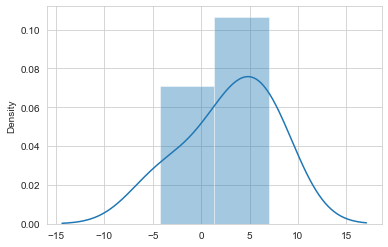

In [50]:
# Distribution of error
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

### What will be predicted score if a student studies for 9.25 hrs/ day?

In [34]:
h=9.25
s=reg.predict([[h]])
print("If a student studies for {} hours per day he/she will score {} % in exam.".format(h,s))

If a student studies for 9.25 hours per day he/she will score [91.56986604] % in exam.


### Final Step 6: Evaluating the model

* The final step is to evaluate the performance of algorithm. This step is quite important to compare how well different algorithms perform on a particular dataset. we have chosen the r2 score and mean absolute error. Also, there are many such metrics which we can choose.

In [35]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

Mean Absolute Error: 4.5916495300630285
R2 score: 0.971014141329942


That means that the model is doing well as we got less MAE and good R-Square value

### Conclusion:

* After Analysing the dataset we got Predicted score around 91 based on the number of study hours i.e., 9.25 hrs/day.